# Avaliação da disciplina Principios de Machine Learning <br> (PDSP-2002 FGV/EAESP)

Esse notebook contem o *starter-code* que voces devem utilizar para preparar e montar o modelo de Machine Learning que será utilizado na avaliação da disciplina. <br>
A avaliação se dará em etapas:

1. entrega do modelo + apresentação oral no dia 23/maio/23 (100% da nota da prova parcial). Nessa avaliação voces deverão apresentar seu entendimento sobre o problema, e uma proposta de solução.
2. coleta das predições dos seus modelos para algumas semanas de maio/23 (50% da nota da prova final)
3. apresentação final no dia 06/junho/23 (50% da nota da prova final). O restante da nota será atribuída conforme as predições que voces devem fazer para as seguintes semanas:
    * até 28/maio/23: predição para 2023-06-02
    * até 04/junho/23: predição para 2023-06-09
    * até 11/junho/23: predição para 2023-06-16

O trabalho poderá ser realizado em grupos de até 3 alunos <br>

## descrição do problema
O objetivo do exercicio será a predição de um target (baseado na captação liquida - vide seção 4) via algoritmo de machine learning. A idéia é treinar modelos com séries historicas de features (ex, numero de cotistas, captações, resgates,...) para prever o z-score da captação líquida na semana subsequente.  
Exemplo: dados as features semanais agregadas pela média:

| DT_COMPTC           |   CAPTC_DIA |   CAPTC_LIQ |   NR_COTST |   RESG_DIA |   VL_PATRIM_LIQ |   VL_QUOTA |    VL_TOTAL |
|:--------------------|------------:|------------:|-----------:|-----------:|----------------:|-----------:|------------:|
| 2021-01-08 00:00:00 |    321914   |     64800.3 |      143.6 |     257113 |     1.45469e+07 |    81.7644 | 1.45024e+07 |
| 2021-01-15 00:00:00 |    357137   |     -4233.1 |      143   |     361370 |     1.45689e+07 |    81.7548 | 1.45274e+07 |
| 2021-01-22 00:00:00 |    158175   |   -398803   |      143   |     556979 |     1.42905e+07 |    81.7599 | 1.42518e+07 |
| 2021-01-29 00:00:00 |     83628.7 |    -77183   |      143   |     160812 |     1.24528e+07 |    81.7566 | 1.24205e+07 |
| 2021-02-05 00:00:00 |    293881   |    127164   |      143   |     166717 |     1.29901e+07 |    81.7656 | 1.29428e+07 |
| 2021-02-12 00:00:00 |    141966   |    -45935.5 |      141.6 |     187902 |     1.30037e+07 |    81.7638 | 1.29616e+07 |

predizer o target:

| DT_COMPTC           |   target |
|:--------------------|------------:|
| 2021-02-19 00:00:00 |   -0.046732 |

Ver abaixo na seção 4, detalhes de como o target foi calculado.

As features já foram manipuladas para facilitar a execução do exercicio e correspondem à média semanal dos valores reportados no informe diário, 
e a data no índice (DT_COMPTC) corresponde a 6a feira, que representa a semana. Por exemplo, o valor de R$321914 contido na 1a linha e 1a coluna do dataframe de features acima,
corresponde a média de 5 dias (4/jan/21 à 8/jan/21) das captações diárias. 

Outros dois dataframes contem dados que podem ser utilizados como features: cadastro e laminas.
Esses dataframes contem uma mescla de dados numericos, categoricos e textuais.

## referencias
portal https://dados.cvm.gov.br/ <br>
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/


## seleção dos fundos escopo do exercício:
A analise irá se limitar a um subconjunto de fundos definidos pelos seguintes critérios de seleção:

* seleção via dataframe informes:
    * fundos com tipo de fundo ('TP_FUNDO') 'FI'
    * fundos criados antes de 1/jun/2021
    * fundos com quantidade de cotistas ('NR_COTST') maior do que 100 no dia 3/jan/2022
* seleção via dataframe cadastro:
    * fundos com situação ('SIT') diferente de 'CANCELADA'
    * fundos com entradas duplicadas serão removidas, e apenas a ultima entrada será considerada (*\) 
    * fundos cuja classe ('CLASSE') é multi-mercado ('Fundo Multimercado') 


(\*) considero que a ordenação é cronologica, já que não encontrei a data de atualização (p. ex. de auditor ou gestor)

## roteiro sugerido para execução:
1. utilizar esse 'starter-code' para carregar os arquivos e manipular os dataframes
2. executar até a seção 5.1 (a 5.2 é opcional)
3. montar seu modelo na seção 5.3
4. montar suas predições na seção 6 para submissão

## avaliação do algoritmo "em produção":
Seu objetivo será prever o z-score da captação líquida para as semanas de avaliação <br>
50% da nota final será atribuída segundo o menor erro RMSE entre suas predições e o valor observado.<br>
Detalhes de como submeter suas predições serão informadas posteriormente.



## Dicas:
1. lookback & escolha do range de datas para treino são duas decisões que voces devem tomar (entre outras) que podem influenciar o desempenho
2. atenção para validação cruzada em problemas de séries temporais (i.e., split temporal, e não aleatorio) 

### obs1:
para os dados de 2020, acessar https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/ baixar o zip correspondente ao ano 2020, incluir no diretorio raw, e descompactar o zip. Um diretorio `inf_diario_fi_2020` será criado
#doone
### obs2:
voce pode seguir o roteiro abaixo para baixar o CDI, caso queira utilizá-lo como feature

1. acessar https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
2. na busca (menu a esquerda) digitar "cdi"
3. selecionar "Interest rate - CDI accumulated in the month" (*\)
4. abaixo, clicar nos botões: "Add Series" e depois "Search Series"
5. clicar no botão: "View values"
6. ao abrir a série historica na página, acima da tabela a direita clicar em "CSV file" para baixar
7. mover o csv baixado para o diretorio raw. anotar o nome do arquivo e alterar abaixo no codigo abaixo (pd.read_csv())
    ```
    cdi = pd.read_csv(RAW_DATA_DIR / 'STI-20221103131759798.csv', sep=';')
    cdi.columns = ['Date', 'cdi']
    cdi['Date'] = pd.to_datetime(cdi['Date'], errors='coerce', ) + pd.tseries.offsets.MonthEnd(1)
    cdi = cdi.dropna()  # elimina linhas que não tem datetime na coluna 'Date'
    cdi = cdi.set_index('Date')
    cdi = cdi.astype(float)
    cdi = cdi['cdi']

    ultimo_mes = cdi.index[-1]
    drop_ultimo_mes = input(f'ultimo mes: {ultimo_mes} taxa talvez reflita mes incompleto. drop ("s" para sim?)')
    if drop_ultimo_mes[0].lower()=='s':
        cdi = cdi.drop(ultimo_mes)
    ```

-----

In [218]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50
from pathlib import Path
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

from datetime import datetime

DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)

RAW_DATA_DIR = Path('raw')
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

## 1. baixando arquivos zip do portal

In [219]:
def baixar_informes_diarios(start='2021-01', end='2023-05', force_download=False, path_local=None):
    """
    essa função somente funciona para os arquivos mensais em:
    https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/
    arquivos anteriores a 2020 (inclusive) encontram-se em 
    https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/
    onde está agrupado por ano (e não por mes)
    """
    informes_diarios_fn = f'informes_diarios_{start}_{end}.pkl'
    informes_diarios_fp = DATA_DIR / informes_diarios_fn

    if informes_diarios_fp.exists() and not force_download:
        print(f'lendo arquivo {informes_diarios_fn} previamente baixado')
        informes = pd.read_pickle(informes_diarios_fp)
    else:
        lista_de_informes_diarios = [str(d.year) + f'{d.month:02d}' for d in pd.date_range(start=start, end=end, freq='MS')]

        informes = list()
        for um_informe_diario in lista_de_informes_diarios:
            if path_local:
                path = os.path.join(path_local, f'inf_diario_fi_{um_informe_diario}.csv')
            else:
                URL = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/'
                path = os.path.join(URL, f'inf_diario_fi_{um_informe_diario}.zip')
                print(f'baixando {path}')
            try:
                um_informe = pd.read_csv(path, sep=';')
                informes.append(um_informe)
            except:
                print(f'erro ao baixar {path}... skip')
                informes_diarios_fn = 'erro'+um_informe_diario + informes_diarios_fn
                informes_diarios_fp = DATA_DIR / informes_diarios_fn
        
        if informes:
            informes = pd.concat(informes)
            informes.to_pickle(informes_diarios_fp)
        
    return informes

In [220]:
informes_2021_2023 = baixar_informes_diarios('2021-01', '2023-04', force_download=False)
informes = informes_2021_2023

lendo arquivo informes_diarios_2021-01_2023-04.pkl previamente baixado


In [221]:
def busca_cadastro_cvm():
  
  try:
    url = 'http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv'
    return pd.read_csv(url, sep=';', encoding='ISO-8859-1')
  except: 
    print(f"Erro ao baixar {url}")

def busca_perfil_mensal_cvm():
  
  try:
    url = 'https://dados.cvm.gov.br/dados/FI/DOC/PERFIL_MENSAL/DADOS/perfil_mensal_fi_202208.csv'
    return pd.read_csv(url, sep=';', encoding='ISO-8859-1')
  except: 
    print(f"Erro ao baixar {url}")
    
from io import BytesIO
from zipfile import ZipFile
import requests    

def busca_laminas_cvm(ano_mes='202108'):
    try:
        url = f'https://dados.cvm.gov.br/dados/FI/DOC/LAMINA/DADOS/lamina_fi_{ano_mes}.zip'
        zipfile = requests.get(url)
        zipfile = ZipFile(BytesIO(zipfile.content))
        laminas = [zipfile.open(fn) for fn in zipfile.namelist() if fn==f'lamina_fi_{ano_mes}.csv']
        return pd.read_csv(laminas.pop(), sep=';', encoding='ISO-8859-1', on_bad_lines='warn')
    except: 
        print(f"Erro ao baixar {url}")

In [222]:
cadastro = busca_cadastro_cvm()
cadastro = cadastro.set_index('CNPJ_FUNDO')
cadastro = cadastro.loc[~cadastro.index.duplicated(keep='last')]

C:\Users\Rafae\AppData\Local\Temp\ipykernel_175364\3228503640.py:5: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url, sep=';', encoding='ISO-8859-1')


In [223]:
laminas = busca_laminas_cvm(ano_mes='202303')
laminas = laminas.set_index('CNPJ_FUNDO')
laminas['OBJETIVO'] = laminas['OBJETIVO'].fillna('')
fundos_OBJETIVO_CDI = laminas[laminas.OBJETIVO.str.contains('CDI')].index

Skipping line 2230: expected 76 fields, saw 113
Skipping line 2841: expected 76 fields, saw 139
Skipping line 2953: expected 76 fields, saw 142



## 2. transformando e manipulando informes

* para features e criação do target

### filtrando por `FI` / qtd de cotistas / data de inicio / não cancelados / multimercado

In [224]:
informes['DT_COMPTC'] = pd.to_datetime(informes['DT_COMPTC'])

In [225]:
# selecao por qtd de cotistas
data_ref_para_selecao_por_qtd_cotistas = '2022-01-03'
numero_minimo_de_cotistas = 100
condicao_qtd_cotistas_1 = informes['DT_COMPTC'] == data_ref_para_selecao_por_qtd_cotistas
condicao_qtd_cotistas_2 = informes['NR_COTST']  >  numero_minimo_de_cotistas
condicao_qtd_cotistas   = condicao_qtd_cotistas_1 & condicao_qtd_cotistas_2
fundos_sel_qtd_cotistas = informes.loc[condicao_qtd_cotistas, 'CNPJ_FUNDO'].unique()

# selecao por data de inicio
data_ref_para_selecao_por_data_de_inicio = '2021-06-01'
fundos_sel_data_inicio = informes.groupby('CNPJ_FUNDO').DT_COMPTC.min() <= data_ref_para_selecao_por_data_de_inicio
fundos_sel_data_inicio = fundos_sel_data_inicio[fundos_sel_data_inicio].index 

# selecao FI
fundos_sel_FI = informes.loc[informes['TP_FUNDO']=='FI', 'CNPJ_FUNDO'].unique()

# selecao por fundos não cancelados no cadastro
fundos_sel_nao_cancelados = cadastro[cadastro['SIT'] != 'CANCELADA'].index

# selecao por classe (renda fixa, multimercado)
fundos_sel_CLASSE_MM = cadastro[cadastro['CLASSE']=='Fundo Multimercado'].index

# selecao final é a intersecção dos conjuntos
fundos_sel = set(fundos_sel_qtd_cotistas) & \
             set(fundos_sel_data_inicio) & \
             set(fundos_sel_FI) & \
             set(fundos_sel_nao_cancelados) & \
             set(fundos_sel_CLASSE_MM)
fundos_sel


{'40.920.230/0001-93',
 '13.812.165/0001-00',
 '18.990.750/0001-13',
 '12.586.238/0001-20',
 '06.032.801/0001-15',
 '34.896.651/0001-23',
 '34.287.184/0001-34',
 '36.617.518/0001-16',
 '30.593.430/0001-25',
 '13.079.634/0001-23',
 '31.964.074/0001-71',
 '17.419.784/0001-90',
 '30.351.337/0001-04',
 '34.246.525/0001-23',
 '17.092.258/0001-68',
 '09.216.364/0001-88',
 '36.350.666/0001-17',
 '23.066.595/0001-83',
 '32.291.899/0001-35',
 '11.182.072/0001-13',
 '40.063.576/0001-12',
 '34.309.552/0001-06',
 '32.319.558/0001-20',
 '29.157.485/0001-03',
 '37.405.108/0001-74',
 '03.565.811/0001-28',
 '23.731.351/0001-78',
 '13.950.062/0001-06',
 '40.063.259/0001-04',
 '39.293.607/0001-42',
 '24.582.449/0001-73',
 '29.733.842/0001-34',
 '05.786.944/0001-50',
 '30.317.454/0001-51',
 '39.960.120/0001-76',
 '28.581.039/0001-69',
 '41.409.761/0001-89',
 '19.154.041/0001-60',
 '33.784.218/0001-33',
 '31.353.372/0001-25',
 '36.976.786/0001-24',
 '37.555.088/0001-18',
 '32.397.847/0001-48',
 '37.467.51

In [226]:
condicao_fundos_FI = informes['TP_FUNDO']=='FI' # alguns fundos aparecem como FI e FMP-FGTS sob o mesmo CNPJ nos arquivos baixados em 29/agosto/2022  
informes = informes[informes['CNPJ_FUNDO'].isin(fundos_sel) & condicao_fundos_FI]

informes = informes.set_index(['DT_COMPTC', 'CNPJ_FUNDO'])

In [227]:
# não deve haver duplicados
informes[informes.index.duplicated(keep=False)]

,,TP_FUNDO,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
DT_COMPTC,CNPJ_FUNDO,,,,,,,


## 3. formatando features
* criar a captação líquida: CAPTC_LIQ
* usaremos a média semanal das variaveis numericas dos informes
* a ancora será a sexta-feira, que corresponde a média dos valores da semana


In [228]:
informes['CAPTC_LIQ'] = informes['CAPTC_DIA'] - informes['RESG_DIA']
features = informes.drop('TP_FUNDO', axis=1).unstack()
features = features.resample('W-FRI').mean()
features = features.swaplevel(axis=1)
features = features.sort_index(axis=1)

* caso queira incluir alguma feature adicional, faça aqui.
* exemplos:
    - médias móveis
    - variações percentuais
    - relações não lineares entre colunas (VL_PATRIM_LIQ/NR_COTST)
    

In [229]:
#colocando as features
incluir_pct_change_VL_QUOTA = False

if incluir_pct_change_VL_QUOTA:
    vl_quota_pct_change = features.filter(like='VL_QUOTA').pct_change().fillna(0)
    vl_quota_pct_change.columns = vl_quota_pct_change.columns.set_levels(
        vl_quota_pct_change.columns.levels[1].str.replace('VL_QUOTA', 'VL_QUOTA_pct_change'), level=1)
    features = pd.concat([features, vl_quota_pct_change], axis=1)
    features = features.sort_index(axis=1)

## 4. formatando o target

* o target corresponde a captação líquida transformada via z-score
* ou seja, o target positivo significa que o fundo teve uma captação liquida superior ao seus pares
* e o target negativo significa que o fundo teve uma captação liquida inferior ao seus pares


In [230]:
idx = pd.IndexSlice

target = features.loc[:, idx[:, 'CAPTC_LIQ']]
mean = target.mean(axis=1)
std  = target.std(axis=1)

target = target.subtract(mean, axis=0).div(std, axis=0)

* checando as médias e desvios-padrão da captação líquida

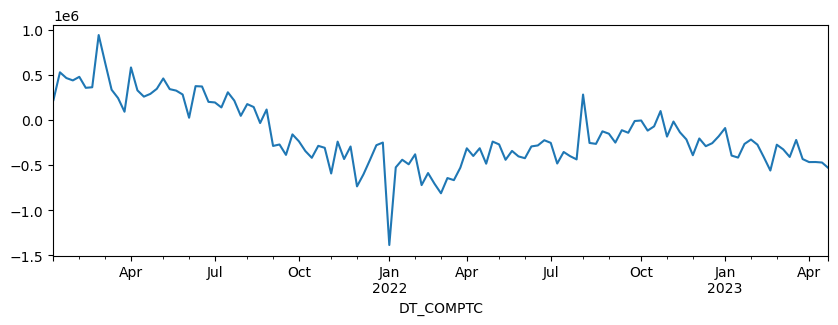

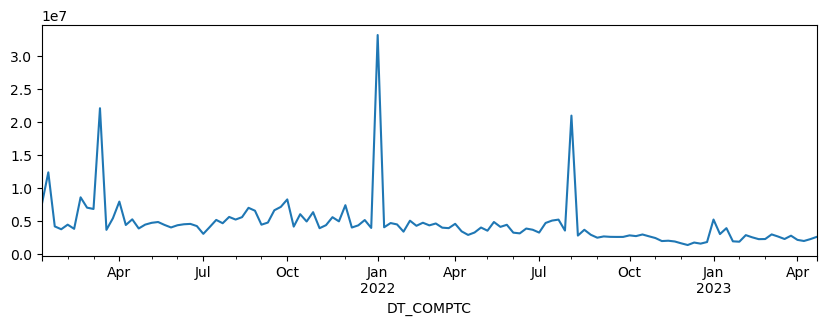

In [231]:
mean.plot(figsize=(10, 3));
plt.show()
std.plot(figsize=(10, 3));

* amostrando e checando algumas features e target de 3 fundos

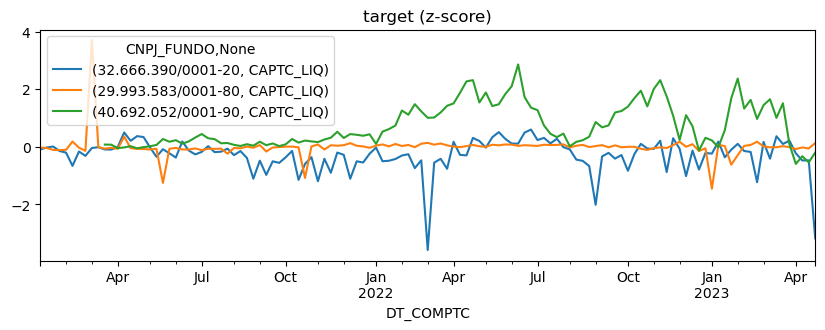

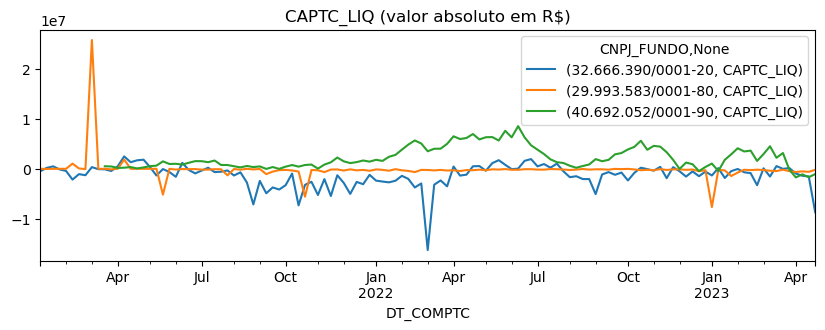

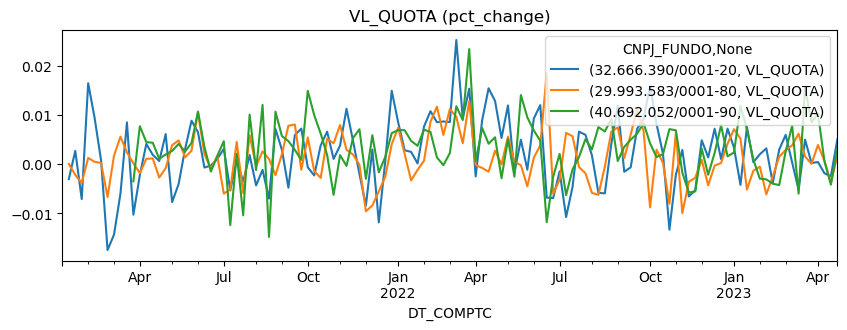

In [232]:
t = target.sample(3, axis=1)
t.plot(figsize=(10, 3), title='target (z-score)');
features.loc[:, idx[t.columns.get_level_values(0), 'CAPTC_LIQ']].plot(figsize=(10,3), title='CAPTC_LIQ (valor absoluto em R$)');
features.loc[:, idx[t.columns.get_level_values(0), 'VL_QUOTA']].pct_change().plot(figsize=(10,3), title='VL_QUOTA (pct_change)');

* deslocando uma semana para formar o target (não é necessário)

In [233]:
target = target.shift(-1)

* drop do nivel 1 das colunas

In [234]:
target = target.droplevel(axis=1, level=1)

### check qtd fundos

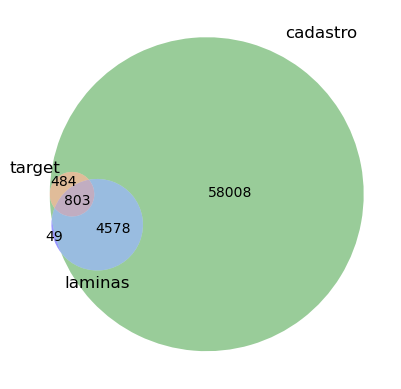

In [235]:
#import matplotlib.pyplot as plt
from  matplotlib import pyplot as plt
#using matplotlib_venn (please install)
from matplotlib_venn import venn3

set1 = set(target.columns.get_level_values(0))
set2 = set(cadastro.index)
set3 = set(laminas.index)

fig = plt.figure()
fig.patch.set_facecolor('white')

venn3([set1, set2, set3], ('target', 'cadastro', 'laminas'))

plt.show()

## 5. modelo de Machine Learning  

### 5.1 construindo X e y

In [236]:
import numpy as np
#(please install tensor flow)
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.python.ops.numpy_ops import np_config
import datetime
import math
import dateutil
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import tensorflow.keras.mixed_precision as mixed_precision
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
import os
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
#from keras.layers import ConvlD
from keras.layers import AlphaDropout
#from keras.layers import GlobalAvgPoollD
from tensorflow.keras.activations import elu
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import linear
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model 
import keras.optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os
from keras.preprocessing.sequence import TimeseriesGenerator
import h5py
import tensorflow_hub as hub

np_config.enable_numpy_behavior()

def timeseries_to_features(features, 
                           ts_slice, 
                           feature_cols, 
                           lookback, 
                           include_target=False, 
                           multiindex_lagged_cols=False, 
                           col_last_level_prefix=None):
    """returns a dataframe with lagged columns. 
    unique column names are assigned (if unique df's are passed in features dict)
    
    if a dataframe with a resampling interval higher than '1min' is passed, all NaNs are dropped
    before lagged features are generated. This encodes longer lookbacks.
    For example if lookback=20 and resample_interval='5min' (see generate_bbands in features_labels_prep.py)
    a total history of 100 minutes are encoded. 
    In each name column, '_1', '_2', ... refer to the timestep in the lag window.
    This refer to 
        * t-1min, t-2min,  ... for a dataset with '1min' granularity, or
        * t-5min, t-10min, ... for a dataset with '5min' granularity (with NaNs in between)
        
    include_target: if True, includes a column with suffix '_0' to be used as the target
                    also, if True, each row index refers to the last feature ts (*NOT* the ts of the target)
                    
    col_last_level_prefix: if input argument `features` is NOT multi-index, adds this prefix to last level (level=-1) of lagged columns
                           example: 'ret', generates lagged columns: ret_6, ret_5,..., ret_1
                           if None, repeats the sliced col as the prefix
                           
    """
    
    if include_target:
        last_ts_idx = -1 #  -1 last idx is '_0', while 0 means last idx is '_1'
        sequence_length = lookback + 1
    else:
        last_ts_idx = 0 
        sequence_length = lookback

    X = list()

    for col in tqdm(feature_cols):
        # print(col)
        input_data = features.loc[ts_slice, col].dropna()
        if len(input_data) <= 1:
            # if length is 1, tensorflow raises error:
            # ValueError: sampling_rate must be higher than 0 and lower than the length of the data. Got: sampling_rate=1 for data of length 1.
            print(f'col {col} with insufficient samples')
            print(input_data)
            continue
        input_dataset = timeseries_dataset_from_array(input_data, None, sequence_length=sequence_length)

        X_col = list() # X_col: X for each col selected
        for batch in input_dataset:
            batch = batch.reshape(batch.shape[0], -1).numpy()
            X_col.append(batch)

        # lagged colnames for the lagged dataframe. if col slicing above return Series, get the name
        input_data_cols = [input_data.name] if isinstance(input_data, pd.Series) else input_data.columns
        # lagged_colnames = [[f'{col}_{subcol}_{l}' if col!=subcol else f'{col}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        if col_last_level_prefix is not None:
            lagged_colnames = [[f'{subcol}_{l}' if col!=subcol else f'{col_last_level_prefix}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        else:
            lagged_colnames = [[f'{subcol}_{l}' if col!=subcol else f'{col}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        lagged_colnames = np.ravel(lagged_colnames)  # flatten
        if multiindex_lagged_cols:
            lagged_colnames = pd.MultiIndex.from_product([[col] , lagged_colnames], names=["CNPJ", "lagged_feature"])

        if X_col: # only if X_col is not empty
            X_col = np.concatenate(X_col)
            X_col = pd.DataFrame(X_col, index=input_data.index[sequence_length-1:], columns=lagged_colnames)
            X.append(X_col)

    X = pd.concat(X, axis=1)
    X = X.reindex(features.loc[ts_slice].index)
    
    if include_target:
        X.index = X.index.shift(-1, freq='W-FRI') # each row index refers to the last feature ts (*NOT* the ts of the target)
    X = X.fillna(method='ffill')

    return X

* capt: contém features (sufixos `'_1', '_2', ...`) e o label (sufixo `'_0'`)

In [237]:
lookback = 6

capt = timeseries_to_features(target, 
                              target.index, target.columns, 
                              lookback, 
                              include_target=True, 
                              multiindex_lagged_cols=True, 
                              col_last_level_prefix='capt')

# drop das linhas que a janela de lookback não traz todos os meses
capt = capt.dropna(how='all')

100%|██████████| 1287/1287 [02:24<00:00,  8.90it/s]


* features_lagged (somente sufixos `'_1', '_2', ...`)

In [238]:
features_lagged = timeseries_to_features(features, 
                                         features.index, features.columns.get_level_values(0).unique(), 
                                         lookback, 
                                         include_target=False, 
                                         multiindex_lagged_cols=True)

# drop das linhas que a janela de lookback não traz todos os meses
# obs: o mes mais recente pode estar incompleto (mas ele é dropado no concat com rets devido ao join='inner')
features_lagged = features_lagged.dropna(how='all')

100%|██████████| 1287/1287 [01:29<00:00, 14.39it/s]


* Xy, X e y

In [239]:
Xy = pd.concat([capt, features_lagged], axis=1, join='inner')
Xy = Xy.sort_index(axis=1).stack(level=0).swaplevel().sort_index()

In [240]:
Xy

lagged_feature                   CAPTC_DIA_1    CAPTC_DIA_2    CAPTC_DIA_3  \
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  141966.288000  293880.686000   83628.684000   
                   2021-02-19  198923.956667  141966.288000  293880.686000   
                   2021-02-26  275156.122000  198923.956667  141966.288000   
                   2021-03-05  464891.616000  275156.122000  198923.956667   
                   2021-03-12  911476.726000  464891.616000  275156.122000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24   29883.252000   25297.512000    1857.898000   
                   2023-03-31   16694.984000   29883.252000   25297.512000   
                   2023-04-07    6281.072500   16694.984000   29883.252000   
                   2023-04-14   80298.108000    6281.072500   16694.984000   
                   2023-04-21    1944.675000   80298.108000    6281.072500   

lagged_feature                   CAPTC_DIA_4  CAPTC_DIA_5  CAPTC_DIA_6  \
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12  158175.424000   357136.632   321913.538   
                   2021-02-19   83628.684000   158175.424   357136.632   
                   2021-02-26  293880.686000    83628.684   158175.424   
                   2021-03-05  141966.288000   293880.686    83628.684   
                   2021-03-12  198923.956667   141966.288   293880.686   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24    4515.652000     7967.700     3656.488   
                   2023-03-31    1857.898000     4515.652     7967.700   
                   2023-04-07   25297.512000     1857.898     4515.652   
                   2023-04-14   29883.252000    25297.512     1857.898   
                   2023-04-21   16694.984000    29883.252    25297.512   

lagged_feature                   CAPTC_LIQ_1    CAPTC_LIQ_2    CAPTC_LIQ_3  \
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  -45935.516000  127164.028000  -77182.962000   
                   2021-02-19  -34305.336667  -45935.516000  127164.028000   
                   2021-02-26  187640.206000  -34305.336667  -45935.516000   
                   2021-03-05   63140.610000  187640.206000  -34305.336667   
                   2021-03-12  664218.692000   63140.610000  187640.206000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24  -19506.330000   16166.260000   -8930.372000   
                   2023-03-31    3246.440000  -19506.330000   16166.260000   
                   2023-04-07   -5244.280000    3246.440000  -19506.330000   
                   2023-04-14   64877.928000   -5244.280000    3246.440000   
                   2023-04-21   -2044.620000   64877.928000   -5244.280000   

lagged_feature                   CAPTC_LIQ_4  CAPTC_LIQ_5  CAPTC_LIQ_6  \
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12 -398803.136000    -4233.098    64800.310   
                   2021-02-19  -77182.962000  -398803.136    -4233.098   
                   2021-02-26  127164.028000   -77182.962  -398803.136   
                   2021-03-05  -45935.516000   127164.028   -77182.962   
                   2021-03-12  -34305.336667   -45935.516   127164.028   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24   -2596.800000     2144.860   -10192.186   
                   2023-03-31   -8930.372000    -2596.800     2144.860   
                   2023-04-07   16166.260000    -8930.372    -2596.800   
                   2023-04-14  -19506.330000    16166.260    -8930.372   
                   2023-04-21    3246.440000   -19506.330    16166.260   

lagged_feature                 NR_COTST_1  N

In [241]:
# ret_0 corresponde ao target
X = Xy.drop('capt_0', axis=1) 
y = Xy['capt_0']

In [242]:
# checar: fundos com capt NaN, não deve haver nenhum
Xy[Xy['capt_0'].isnull()].index.get_level_values(0)

Index([], dtype='object', name='CNPJ')

### 5.2 enriquecendo o X com cadastro e/ou laminas (opcional)

In [243]:
# cadastro = cadastro.loc[target.columns]

# DT_cols = cadastro.filter(like='DT_').columns      # extract year
# CNPJ_cols = cadastro.filter(like='CNPJ_').columns  # drop
# INF_TAXA_cols = cadastro.filter(like='INF_TAXA_')  # drop
# TAXA_cols = ['TAXA_PERFM', 'TAXA_ADM']             # numeric - passthrough

# # (biased) manual selection for OHE
# OHE_cols = ['ADMIN', 'AUDITOR', 'CLASSE', 'CONTROLADOR', 'CUSTODIANTE', 'GESTOR', 'RENTAB_FUNDO', 'TRIB_LPRAZO']

# # tf-idf
# DENOM_SOCIAL_col = ['DENOM_SOCIAL']
...

Ellipsis

### 5.3 montando e validando seu modelo
> **essa seção será corrigida**

In [244]:
X

lagged_feature                   CAPTC_DIA_1    CAPTC_DIA_2    CAPTC_DIA_3  \
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  141966.288000  293880.686000   83628.684000   
                   2021-02-19  198923.956667  141966.288000  293880.686000   
                   2021-02-26  275156.122000  198923.956667  141966.288000   
                   2021-03-05  464891.616000  275156.122000  198923.956667   
                   2021-03-12  911476.726000  464891.616000  275156.122000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24   29883.252000   25297.512000    1857.898000   
                   2023-03-31   16694.984000   29883.252000   25297.512000   
                   2023-04-07    6281.072500   16694.984000   29883.252000   
                   2023-04-14   80298.108000    6281.072500   16694.984000   
                   2023-04-21    1944.675000   80298.108000    6281.072500   

lagged_feature                   CAPTC_DIA_4  CAPTC_DIA_5  CAPTC_DIA_6  \
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12  158175.424000   357136.632   321913.538   
                   2021-02-19   83628.684000   158175.424   357136.632   
                   2021-02-26  293880.686000    83628.684   158175.424   
                   2021-03-05  141966.288000   293880.686    83628.684   
                   2021-03-12  198923.956667   141966.288   293880.686   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24    4515.652000     7967.700     3656.488   
                   2023-03-31    1857.898000     4515.652     7967.700   
                   2023-04-07   25297.512000     1857.898     4515.652   
                   2023-04-14   29883.252000    25297.512     1857.898   
                   2023-04-21   16694.984000    29883.252    25297.512   

lagged_feature                   CAPTC_LIQ_1    CAPTC_LIQ_2    CAPTC_LIQ_3  \
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  -45935.516000  127164.028000  -77182.962000   
                   2021-02-19  -34305.336667  -45935.516000  127164.028000   
                   2021-02-26  187640.206000  -34305.336667  -45935.516000   
                   2021-03-05   63140.610000  187640.206000  -34305.336667   
                   2021-03-12  664218.692000   63140.610000  187640.206000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24  -19506.330000   16166.260000   -8930.372000   
                   2023-03-31    3246.440000  -19506.330000   16166.260000   
                   2023-04-07   -5244.280000    3246.440000  -19506.330000   
                   2023-04-14   64877.928000   -5244.280000    3246.440000   
                   2023-04-21   -2044.620000   64877.928000   -5244.280000   

lagged_feature                   CAPTC_LIQ_4  CAPTC_LIQ_5  CAPTC_LIQ_6  \
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12 -398803.136000    -4233.098    64800.310   
                   2021-02-19  -77182.962000  -398803.136    -4233.098   
                   2021-02-26  127164.028000   -77182.962  -398803.136   
                   2021-03-05  -45935.516000   127164.028   -77182.962   
                   2021-03-12  -34305.336667   -45935.516   127164.028   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24   -2596.800000     2144.860   -10192.186   
                   2023-03-31   -8930.372000    -2596.800     2144.860   
                   2023-04-07   16166.260000    -8930.372    -2596.800   
                   2023-04-14  -19506.330000    16166.260    -8930.372   
                   2023-04-21    3246.440000   -19506.330    16166.260   

lagged_feature                 NR_COTST_1  N

In [245]:
y

CNPJ                DT_COMPTC 
00.089.915/0001-15  2021-02-12   -0.108178
                    2021-02-19   -0.084474
                    2021-02-26    0.014767
                    2021-03-05   -0.147886
                    2021-03-12   -0.068315
                                    ...   
41.771.697/0001-81  2023-03-24    0.217895
                    2023-03-31    0.272251
                    2023-04-07    0.209983
                    2023-04-14    0.204918
                    2023-04-21    0.204918
Name: capt_0, Length: 147023, dtype: float64

In [246]:
#importamos varias bibliotecas acima de modo a criarmos o nosso modelo
lookfoward = 1 # numero de dias que queremos prever no futuro
batchsize = 400 # Tamanho do lote, quanto maior mais rápido

# de acordo com o nosso conjunto de entrada definimos os parametros
n_parametros = X.shape
n_parametros = n_parametros[1] 

trainX = X.values

#normalizando o conjunto de treino
trainX = trainX / trainX.max()
trainY = y.values
trainY = trainY / trainY.max()

testX = X.values
testY = y.values #testX[: , 0] 

# conjunto de treino e dee teste utilizando o timeseries
geradortreino = TimeseriesGenerator(trainX , trainY , length =lookback ,batch_size =batchsize) 
geradorteste = TimeseriesGenerator(testX , testY , length =lookback ,batch_size =batchsize)


def create_model(n_input, n_parametros, lookfoward=lookfoward, batches=batchsize):
# criacao da rede neural
#Para esta tarefa foi empregada uma rede mista CNN-LSTM, uma vez que esse tipo de estrutura neural é capaz de mesclar as vantagens proporcionadas por cada rede individual. 
# Nesta circunstância particular, é necessário que a rede seja capaz de reconhecer padrões de comportamento nos dados utilizando uma rede CNN.
#  Posteriormente, a rede examina a sequência de ocorrência desses padrões ao longo do tempo por meio de uma rede LSTM.
    model = Sequential( )
    model.add(Input(shape =(n_input , n_parametros)) )
    model.add(MaxPooling1D( pool_size = 2 ) )
    model.add(Flatten() )
    model.add(RepeatVector(lookfoward) )
    model.add(LSTM(100, return_sequences = True ) )
    model.add(TimeDistributed(Dense( 100 , activation = "relu" ) ) )
    model.add(TimeDistributed(Dense( 1 ) ) )
    print('================================================================')
    print("\nO resultado do modelo eh:\n")
    model.summary()
    return model 


# cria o modelo
model = create_model(lookback , n_parametros ) 

#compila o modelo

#Definimos a função de perda (loss function) apropriada para o  problema (no caso, mean_squared_error para problemas de regressão).
#Escolhemos um otimizador (por exemplo, Adam, SGD) e métricas para avaliação do modelo.
model.compile( loss = "mse" , optimizer = "Adam" , metrics =[tf.keras.metrics.RootMeanSquaredError()] )
mc = ModelCheckpoint( 'melhormodelo.h5', monitor = 'val_loss' , mode='min', save_best_only=True ) # salva o melhor modelo


#treina o modelo
#validation_split: Float between 0 and 1. The fraction of the training data to be used as validation data. 
#The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
#The validation data is selected from the last samples in the x and y data provided, before shuffling.

historico = model.fit(geradortreino, epochs=10, validation_data =(geradorteste) ,validation_freq = 10 , callbacks =[mc], validation_split=0.1)


#carrega o melhor modelo
#model = load_model( 'melhormodelo.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model == tf.keras.models.load_model('melhormodelo.h5')#


#faz predicoes usando o conjunto de teste
results = model.evaluate(geradorteste) 
print('================================================================')
print("\nOs resultados das avaliacoes do conjunto de teste sao:\n")
print (results ) 

#faz as predicoes

#Depois de treinar o modelo, é essencial gerar predições utilizando os conjuntos de dados reservados para teste. 
#Dessa forma, podemos avaliar de forma precisa o desempenho do modelo em dados que ele não teve contato prévio (ex-post).
#Após realizar as previsões, é necessário realizar a reversão da escala dos resultados obtidos usando a mesma escala aplicada na transformação dos conjuntos de treino e teste.
#Isso permite que os resultados sejam comparados com os dados reais.
teste_predicto = model.predict(geradorteste) #


O resultado do modelo eh:

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d_12 (MaxPoolin  (None, 3, 48)            0         
 g1D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 144)               0         
                                                                 
 repeat_vector_12 (RepeatVec  (None, 1, 144)           0         
 tor)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 1, 100)            98000     
                                                                 
 time_distributed_24 (TimeDi  (None, 1, 100)           10100     
 stributed)                                                      
                         

## 6. Preparando sua submissão  

In [247]:
print('================================================================')
print('\n Os resultados das predicoes sao:')
print(teste_predicto)

#caso o modelo retorne em 3d muda para 2d
if len (teste_predicto.shape ) == 3:
    teste_predicto = teste_predicto[: , :, 0] 

#calculando o rmse a partir do mse
testY = testY[:-6] #coloca no mesmo tamanho
rmse_test = np.sqrt(mean_squared_error(testY,teste_predicto))
print('================================================================')
print('\n Rmse no conjunto de dados em relacao ao conjunto preditivo eh ',rmse_test)


 Os resultados das predicoes sao:
[[[-0.33667913]]

 [[-0.33958995]]

 [[-0.22876336]]

 ...

 [[-0.26842055]]

 [[-0.20150867]]

 [[-0.15526263]]]

 Rmse no conjunto de dados em relacao ao conjunto preditivo eh  1.0165454952373687


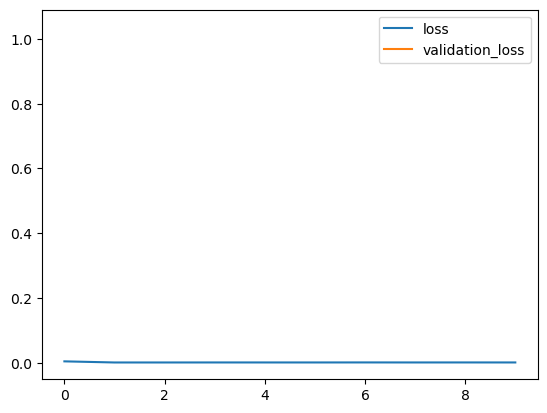

In [248]:

pyplot.plot(historico.history[ 'loss' ] )
pyplot.plot(historico.history[ 'val_loss' ] )
pyplot.legend([ 'loss' , 'validation_loss' ] )
pyplot.show( ) 

#val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data. 
# On validation data, neurons using drop out do not drop random neurons. The reason is that during training we use drop out in order to add some noise for avoiding over-fitting. 
# During calculating cross-validation, we are in the recall phase and not in the training phase. We use all the capabilities of the network.
#Obs: Se aumentar o epoch aumenta o validation loss


 Os resultados da saida alvo x predicao:


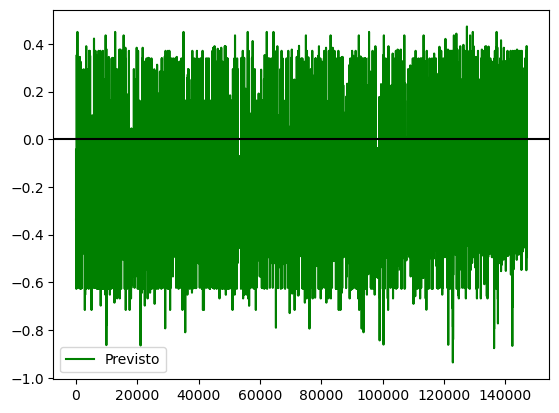

In [249]:
print('================================================================')
print('\n Os resultados da predicao:')
#pyplot.plot(target , color = "blue" , label = "Alvo" )
cs = MinMaxScaler( feature_range =(- 1 , 1 ) )   
#trainY = cs.fit_transform(geradorteste) 
#teste_predicto[: ] = cs.inverse_transform(teste_predicto)[: , 0] 
pyplot.plot(teste_predicto , color = "green" , label = "Previsto" )
pyplot.axhline( y = 0.0 , color = 'black' , linestyle = '-' )
pyplot.legend( ) 